# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [43]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
from tabulate import tabulate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, auc
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [27]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  28.5M      0 --:--:--  0:00:30 --:--:-- 32.1M


In [28]:
!gunzip SUSY.csv.gz

gzip: SUSY.csv already exists; do you wish to overwrite (y or n)? ^C


In [29]:
filename = "/content/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta",
            "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
            "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

# df = pd.read_csv(filename, dtype='float64', names=VarNames, compression='gzip')
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [30]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [31]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [32]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

In [33]:
# print(Test_sig.columns)
# print(Test_bkg.columns)
# print(VarNames[1:])

In [34]:
# Test_sig.columns = VarNames
# Test_bkg.columns = VarNames

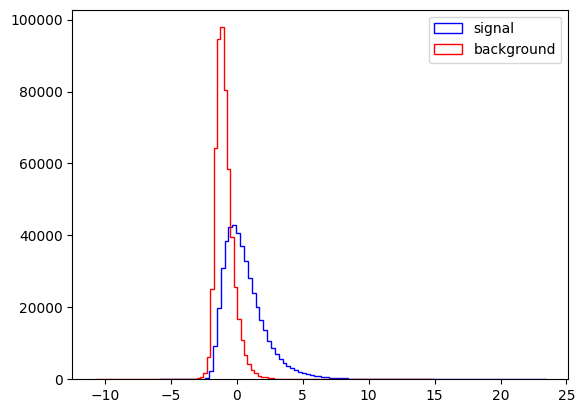

In [35]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

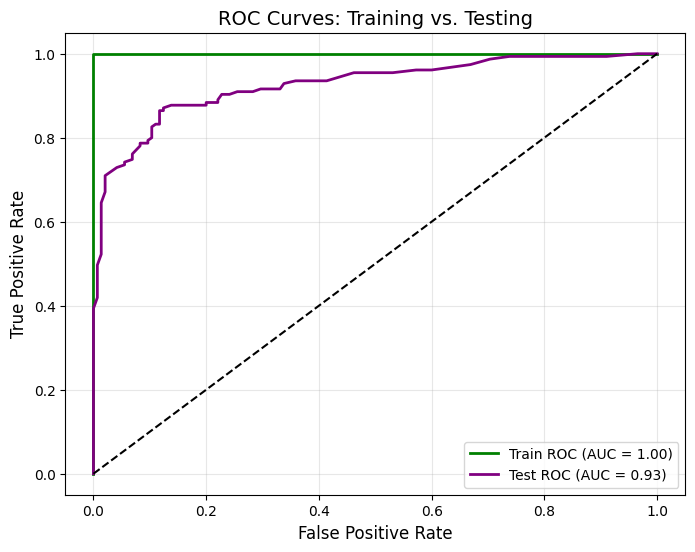

In [36]:


# Create synthetic dataset
features, labels = make_classification(n_samples=1000, n_features=20, random_state=42)

# Divide dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

# Initialize and train the classifier
classifier = RandomForestClassifier()
classifier.fit(train_features, train_labels)

# Obtain predicted probabilities
train_probabilities = classifier.predict_proba(train_features)[:, 1]
test_probabilities = classifier.predict_proba(test_features)[:, 1]

# Compute ROC metrics
train_fpr, train_tpr, _ = roc_curve(train_labels, train_probabilities)
test_fpr, test_tpr, _ = roc_curve(test_labels, test_probabilities)

# Compute AUC for training and testing sets
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Visualize ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f"Train ROC (AUC = {train_auc:.2f})", color="green", linewidth=2)
plt.plot(test_fpr, test_tpr, label=f"Test ROC (AUC = {test_auc:.2f})", color="purple", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="black")  # Diagonal reference line
plt.title("ROC Curves: Training vs. Testing", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


If the test ROC curve closely aligns with the training ROC curve, it implies that the model generalizes effectively and exhibits minimal overfitting.

However, if the test ROC curve falls noticeably below the training ROC curve, it could signal overfitting. This means the model performs well on the training data but struggles to generalize to unseen data, indicating potential bias or an overfitting problem.

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

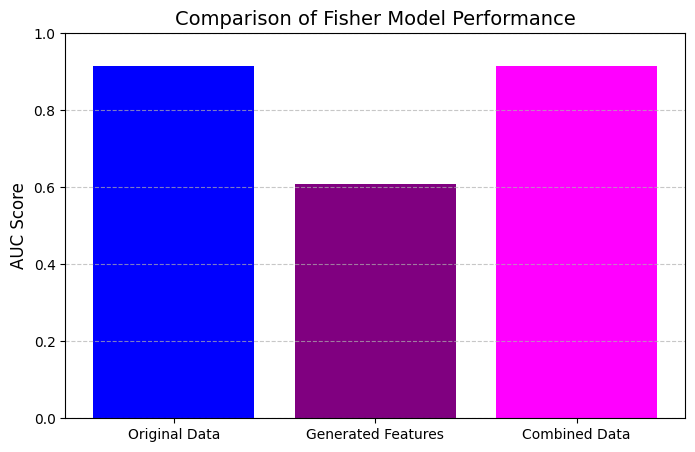

In [37]:


# Step 1: Create synthetic dataset
data, target = make_classification(n_samples=1000, n_features=20, random_state=42)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, target, test_size=0.3, random_state=42
)

# Step 2: Prepare input sets
# Original features
raw_train, raw_test = train_data, test_data

# Generated features (mean and std deviation of rows)
generated_train = np.c_[train_data.mean(axis=1), train_data.std(axis=1)]
generated_test = np.c_[test_data.mean(axis=1), test_data.std(axis=1)]

# Combined original + generated features
combined_train = np.c_[raw_train, generated_train]
combined_test = np.c_[raw_test, generated_test]

# Step 3: Initialize LDA models for each input type
lda_raw = LDA()
lda_generated = LDA()
lda_combined = LDA()

# Step 4: Train models
lda_raw.fit(raw_train, train_labels)
lda_generated.fit(generated_train, train_labels)
lda_combined.fit(combined_train, train_labels)

# Step 5: Predict probabilities and calculate AUC
raw_probabilities = lda_raw.predict_proba(raw_test)[:, 1]
generated_probabilities = lda_generated.predict_proba(generated_test)[:, 1]
combined_probabilities = lda_combined.predict_proba(combined_test)[:, 1]

auc_raw = roc_auc_score(test_labels, raw_probabilities)
auc_generated = roc_auc_score(test_labels, generated_probabilities)
auc_combined = roc_auc_score(test_labels, combined_probabilities)

# Step 6: Visualize results
plt.figure(figsize=(8, 5))
input_types = ['Original Data', 'Generated Features', 'Combined Data']
auc_values = [auc_raw, auc_generated, auc_combined]
plt.bar(input_types, auc_values, color=['blue', 'purple', 'magenta'])
plt.ylabel('AUC Score', fontsize=12)
plt.title('Comparison of Fisher Model Performance', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



If the combination of raw data and engineered features yields the best performance, it indicates that both the original attributes and the engineered features contribute valuable information, enhancing the model's discriminative ability.

On the other hand, if the engineered features alone perform as well as or better than the raw data, it suggests that the engineered features effectively encapsulate critical information, potentially offering a more concise and meaningful representation than the raw data.

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

Part a answer:

*   Logistic Regression
*   SVM
*   Random Forrest



In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def assess_model(model, train_features, test_features, train_labels, test_labels):
    model.fit(train_features, train_labels)

    predictions = model.predict(test_features)

    acc = accuracy_score(test_labels, predictions)
    prec = precision_score(test_labels, predictions)
    rec = recall_score(test_labels, predictions)

    return acc, prec, rec


In [39]:

def calculate_max_significance(signal_events, background_events):
    return signal_events / np.sqrt(signal_events + background_events)

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

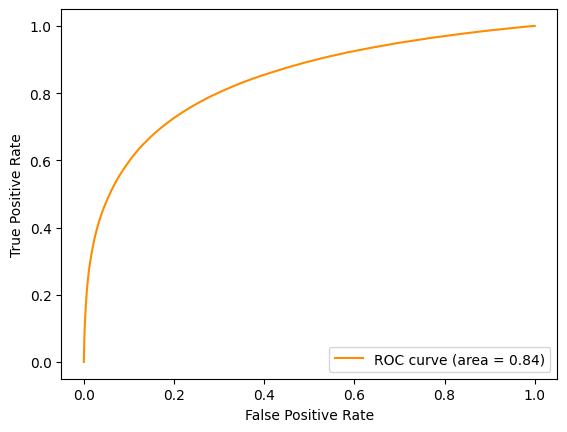

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [42]:

def calculate_and_display_metrics(model, train_features, test_features, train_labels, test_labels):

    model.fit(train_features, train_labels)
    predictions = model.predict(test_features)
    probabilities = model.predict_proba(test_features)[:, 1] if hasattr(model, "predict_proba") else None

    true_neg, false_pos, false_neg, true_pos = confusion_matrix(test_labels, predictions).ravel()
    true_positive_rate = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    false_positive_rate = false_pos / (false_pos + true_neg) if (false_pos + true_neg) > 0 else 0

    acc = accuracy_score(test_labels, predictions)
    prec = precision_score(test_labels, predictions)
    rec = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    auc_score = roc_auc_score(test_labels, probabilities) if probabilities is not None else None

    max_significance = true_pos / (true_pos + false_pos)**0.5 if (true_pos + false_pos) > 0 else 0

    metrics_table = pd.DataFrame({
        "Metric": ["True Positive Rate (Recall)", "False Positive Rate", "Accuracy",
                   "Precision", "F1 Score", "AUC", "Maximal Significance"],
        "Value": [true_positive_rate, false_positive_rate, acc, prec, f1, auc_score, max_significance]
    })

    return metrics_table

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
results_table = calculate_and_display_metrics(classifier, X_train, X_test, y_train, y_test)
print(results_table)


                        Metric      Value
0  True Positive Rate (Recall)   0.851613
1          False Positive Rate   0.110345
2                     Accuracy   0.870000
3                    Precision   0.891892
4                     F1 Score   0.871287
5                          AUC   0.927075
6         Maximal Significance  10.850333
